<a href="https://colab.research.google.com/github/shivaniep/emotiondetection/blob/main/emotion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=>**Emotion Detection of images.**

=>Emotion Detecting using Deepface package.

=>Installation of deepface package

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=0678a067045b7cf2608953be4ebea0d4680a68173cef642ba1df9bd8cfe89b4a
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
from deepface import DeepFace

23-12-27 09:35:47 - Directory /root/.deepface created
23-12-27 09:35:47 - Directory /root/.deepface/weights created


In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

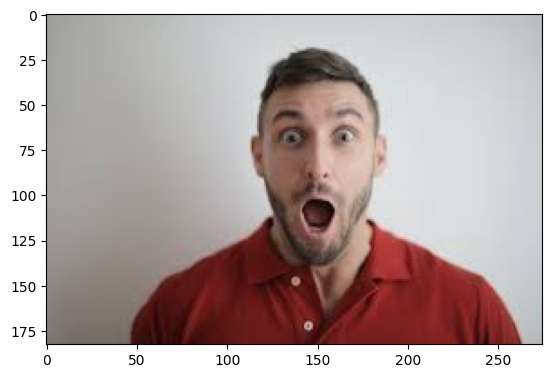

In [ ]:
img1=cv2.imread("/content/surprised img.jpg")
plt.imshow(img1[:,:,::-1])
plt.show()

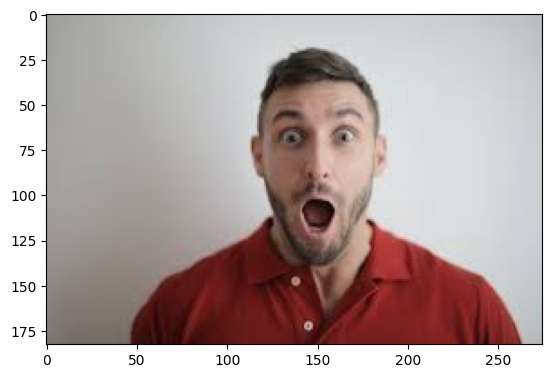

In [ ]:
img1=cv2.imread("/content/surprised img.jpg")
plt.imshow(img1[:,:,::-1])
plt.show()

In [ ]:
result=DeepFace.analyze(img1,actions=['emotion'])

In [ ]:
print(result)

[{'emotion': {'angry': 7.782497424280166e-08, 'disgust': 2.1033337684942187e-16, 'fear': 0.010426699736854061, 'happy': 2.8901771642608765e-06, 'sad': 4.72808065214627e-12, 'surprise': 99.9895691871643, 'neutral': 4.839255399363468e-15}, 'dominant_emotion': 'surprise', 'region': {'x': 110, 'y': 36, 'w': 84, 'h': 84}, 'face_confidence': 7.22520599712152}]


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display,Javascript
from google.colab.output import eval_js
from base64 import b64decode

=>Accessing web cam of the device using JS.

In [ ]:
def take_photo(filename='photo.jpg',quality=0.8):
  js=Javascript('''
    async function takePhoto(quality){
      const div=document.createElement('div');
      const capture=document.createElement('button');
      capture.textContent='Capture';
      div.appendChild(capture);

      const video=document.createElement('video');
      video.style.display='block';
      const stream =await navigator.mediaDevices.getUserMedia({video:true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject=stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight,true);

      await new Promise((resolve)=>capture.onclick=resolve);

      const canvas=document.createElement('canvas');
      canvas.width=video.videoWidth;
      canvas.height=video.videoHeight;
      canvas.getContext('2d').drawImage(video,0,0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image\jpeg',quality);
    }
    ''')
  display(js)
  data=eval_js('takePhoto({})'.format(quality))
  binary=b64decode(data.split(',')[1])
  with open(filename,'wb') as f:
    f.write(binary)
  return filename

In [ ]:
image_file=take_photo()

<IPython.core.display.Javascript object>

=>Reading the captured image.

400 300


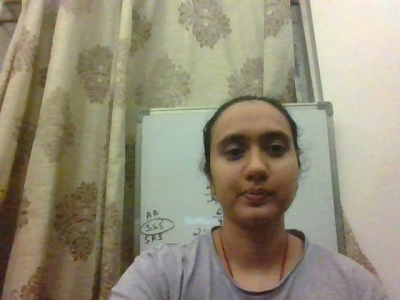

In [ ]:
image=cv2.imread(image_file)
image=imutils.resize(image,width=400)
(h,w)=image.shape[:2]
print(w,h)
cv2_imshow(image)

In [ ]:
result=DeepFace.analyze(image,actions=['emotion'])

In [ ]:
print(result)

[{'emotion': {'angry': 0.2829672768712044, 'disgust': 4.428824529334463e-08, 'fear': 0.02778286288958043, 'happy': 0.005333124499884434, 'sad': 2.4946486577391624, 'surprise': 1.133982436840597e-05, 'neutral': 97.18925952911377}, 'dominant_emotion': 'neutral', 'region': {'x': 197, 'y': 102, 'w': 119, 'h': 119}, 'face_confidence': 7.845530055172276}]


=>Emotion detection by using a NN model.

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install --upgrade google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os
zip_file_path = '/content/archive.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('emotions')

In [ ]:
train_data_dir = 'emotions/train'
validation_data_dir = 'emotions/test'

In [ ]:
img_width, img_height = 48, 48
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 10

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs, validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
897/897 [==============================] - 44s 46ms/step - loss: 1.6917 - accuracy: 0.3198 - val_loss: 1.4822 - val_accuracy: 0.4291
Epoch 2/10
897/897 [==============================] - 40s 45ms/step - loss: 1.4564 - accuracy: 0.4386 - val_loss: 1.3613 - val_accuracy: 0.4827
Epoch 3/10
897/897 [==============================] - 40s 45ms/step - loss: 1.3477 - accuracy: 0.4858 - val_loss: 1.2756 - val_accuracy: 0.5092
Epoch 4/10
897/897 [==============================] - 40s 45ms/step - loss: 1.2783 - accuracy: 0.5107 - val_loss: 1.2415 - val_accuracy: 0.5194
Epoch 5/10
897/897 [==============================] - 43s 48ms/step - loss: 1.2396 - accuracy: 0.5302 - val_loss: 1.2144 - val_accuracy: 0.5375
Epoch 6/10
897/897 [==============================] - 49s 54ms/step - loss: 1.2089 - accuracy: 0.5392 - val_loss: 1.1790 - val_accuracy: 0.5460
Epoch 7/10
897/897 [==============================] - 47s 52ms/step - loss: 1.1800 - accuracy: 0.5499 - val_loss: 1.1971 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

224/224 [==============================] - 3s 12ms/step - loss: 1.1874 - accuracy: 0.5481
Validation Loss: 1.1873629093170166, Validation Accuracy: 0.5481305718421936


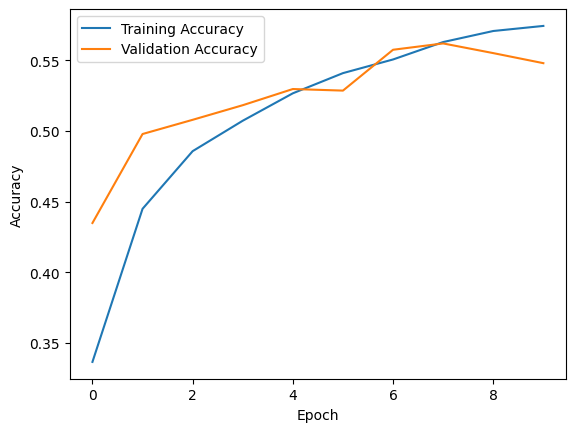

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('emo-detect.h5')

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
model = load_model('emo-detect.h5')

In [ ]:
emotion_mapping = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprised'
}

In [ ]:
img = image.load_img('/content/surprised img.jpg', target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 216ms/step


In [ ]:
emotion_class = np.argmax(predictions)

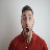

Predicted Emotion: fear


In [ ]:
img_bgr = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
resized_img = cv2.resize(img_bgr, (50, 50))
cv2_imshow(resized_img)
predicted_emotion = emotion_mapping.get(emotion_class, 'Unknown Emotion')
print(f'Predicted Emotion: {predicted_emotion}')

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
from google.colab import files
import imutils

In [ ]:
model = load_model('emo-detect.h5')

In [ ]:
emotion_mapping = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprised'
}

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display,Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='photo.jpg',quality=0.8):
  js=Javascript('''
    async function takePhoto(quality){
      const div=document.createElement('div');
      const capture=document.createElement('button');
      capture.textContent='Capture';
      div.appendChild(capture);

      const video=document.createElement('video');
      video.style.display='block';
      const stream =await navigator.mediaDevices.getUserMedia({video:true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject=stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight,true);

      await new Promise((resolve)=>capture.onclick=resolve);

      const canvas=document.createElement('canvas');
      canvas.width=video.videoWidth;
      canvas.height=video.videoHeight;
      canvas.getContext('2d').drawImage(video,0,0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image\jpeg',quality);
    }
    ''')
  display(js)
  data=eval_js('takePhoto({})'.format(quality))
  binary=b64decode(data.split(',')[1])
  with open(filename,'wb') as f:
    f.write(binary)
  return filename

In [ ]:
image_file=take_photo()

<IPython.core.display.Javascript object>

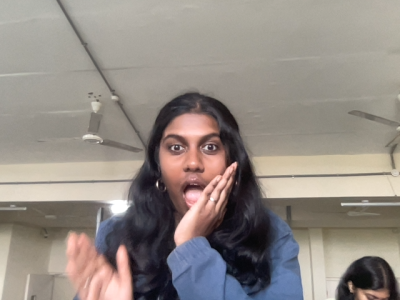

1/1 [==============================] - 0s 29ms/step
Predicted Emotion: happy


In [ ]:
image = cv2.imread(image_file)
image = imutils.resize(image, width=400)

# Resize the image to match the model's expected input shape
img_array = cv2.resize(image, (48, 48))
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the pixel values

# Display the resized image
cv2_imshow(image)

# Make predictions
predictions = model.predict(img_array)

# Get the predicted emotion class
emotion_class = np.argmax(predictions)

# Get the predicted emotion name using the mapping
predicted_emotion = emotion_mapping.get(emotion_class, 'Unknown Emotion')

# Print the predicted emotion
print(f'Predicted Emotion: {predicted_emotion}')